<a href="https://colab.research.google.com/github/harsha1067/ASSIGNMENTS/blob/main/Assignment_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classify the Size_Categorie using SVM


month of the year: 'jan' to 'dec'

day of the week: 'mon' to 'sun'

FFMC index from the FWI system: 18.7 to 96.20

DMC index from the FWI system: 1.1 to 291.3

DC index from the FWI system: 7.9 to 860.6

ISI index from the FWI system: 0.0 to 56.10

temperature in Celsius degrees: 2.2 to 33.30

relative humidity in %: 15.0 to 100

wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix 

In [2]:
ff = pd.read_csv("forestfires.csv")
ff.head(11)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [3]:
data = ff.describe()

In [4]:
ff.drop(["month", "day"], axis = 1, inplace = True)
ff.head(11)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,small
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,small
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,small
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,small
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,small


In [5]:
pred = ff.iloc[:, 0:24]
target = ff.iloc[:, 24]
pred

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,1,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,1,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,1,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
target

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: monthmay, Length: 517, dtype: int64

In [7]:
def norm_func(i):
  x = (i - i.min())/(i.max() - i.min())
  return(x)

In [8]:
ff1 = norm_func(pred)
ff1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(pred, target, test_size = 0.25, stratify = target)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((387, 24), (387,), (130, 24), (130,))

In [11]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [12]:
pred_test_linear = model_linear.predict(x_test)

In [13]:
np.mean(pred_test_linear == y_test)

0.9846153846153847

In [14]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy:", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy: 98.46153846153847


array([[128,   1],
       [  1,   0]])

In [15]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [16]:
pred_test_poly = model_poly.predict(x_test)

In [17]:
np.mean(pred_test_poly == y_test)

0.9923076923076923

In [18]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train, y_train)

SVC()

In [19]:
pred_test_rbf = model_rbf.predict(x_test)

In [20]:
np.mean(pred_test_rbf == y_test)

0.9923076923076923

In [21]:
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [22]:
pred_test_sig = model_rbf.predict(x_test)

In [23]:
np.mean(pred_test_sig == y_test)

0.9923076923076923

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the 
sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix 

In [25]:
train = pd.read_csv('SalaryData_Train(1).csv.crdownload', encoding = 'latin-1')
train.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [26]:
test = pd.read_csv('SalaryData_Test(1).csv')
test.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [62]:
train1 = train.dropna()
print(train1)

       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          6          9         13.0              4           0   
1       50          5          9         13.0              2           3   
2       38          3         11          9.0              0           5   
3       53          3          1          7.0              2           5   
4       28          3          9         13.0              2           9   
...    ...        ...        ...          ...            ...         ...   
18682   36          3         12         14.0              2           3   
18683   52          4         14         15.0              2          11   
18684   44          4          9         13.0              2           3   
18685   53          3         15         10.0              2          11   
18686   36          3          9         13.0              2          11   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0            

In [63]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18687 entries, 0 to 18686
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            18687 non-null  int64  
 1   workclass      18687 non-null  int64  
 2   education      18687 non-null  int64  
 3   educationno    18687 non-null  float64
 4   maritalstatus  18687 non-null  int64  
 5   occupation     18687 non-null  int64  
 6   relationship   18687 non-null  int64  
 7   race           18687 non-null  int64  
 8   sex            18687 non-null  int64  
 9   capitalgain    18687 non-null  float64
 10  capitalloss    18687 non-null  float64
 11  hoursperweek   18687 non-null  float64
 12  native         18687 non-null  int64  
 13  Salary         18687 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 2.1+ MB


In [64]:
train1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000,18687.000000
mean,38.489431,3.097715,10.340718,10.125381,2.582598,5.964842,1.423235,3.682025,0.674801,1074.612993,88.559694,40.901803,35.398298
std,13.175220,1.144620,3.794432,2.531015,1.502153,4.045880,1.602030,0.830767,0.468462,7369.088210,403.096231,11.905050,6.018926
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,3.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,3.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,7.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int64 
 2   education      15060 non-null  int64 
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  int64 
 5   occupation     15060 non-null  int64 
 6   relationship   15060 non-null  int64 
 7   race           15060 non-null  int64 
 8   sex            15060 non-null  int64 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  int64 
 13  Salary         15060 non-null  object
dtypes: int64(13), object(1)
memory usage: 1.6+ MB


In [66]:
test.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [67]:
train1[train1.isnull().any(axis = 1)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [102]:
train1[train1.isnull().any(axis = 1)].shape

(0, 14)

In [68]:
train1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [69]:
test[test.isnull().any(axis = 1)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [70]:
test[test.isnull().any(axis = 1)].shape

(0, 14)

In [71]:
train1['Salary'].value_counts()

 <=50K    14091
 >50K      4596
Name: Salary, dtype: int64

In [72]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [73]:
pd.crosstab(train1['occupation'], train1['Salary'])

Salary,<=50K,>50K
occupation,,
0,2067,307
1,7,0
2,1922,550
3,1260,1174
4,520,63
5,746,52
6,1066,154
7,1916,89
8,102,0


In [74]:
pd.crosstab(train1['workclass'], train1['Salary'])

Salary,<=50K,>50K
workclass,,
0,370,223
1,927,369
3,10785,2981
4,295,372
5,1129,442
6,579,209
7,6,0


In [75]:
pd.crosstab(train1['occupation'], train1['workclass'])

workclass,0,1,3,4,5,6,7
occupation,,,,,,,
0,195,176,1786,20,36,161,0
1,7,0,0,0,0,0,0
2,42,93,1903,63,338,32,1
3,102,132,1602,249,235,114,0
4,4,21,254,26,269,7,2
5,14,25,746,1,8,3,1
6,9,5,1163,8,26,8,1
7,26,123,1662,13,105,76,0
8,0,0,102,0,0,0,0


In [76]:
pd.crosstab(test['workclass'], test['Salary'])

Salary,<=50K,>50K
workclass,,
0,279,184
1,727,306
2,8646,2375
3,260,312
4,952,345
5,491,176
6,5,2


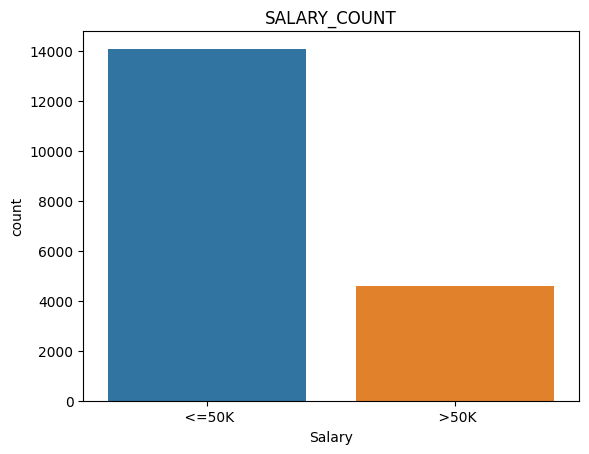

 <=50K    14091
 >50K      4596
Name: Salary, dtype: int64

In [77]:
sns.countplot(x = 'Salary', data = train1)
plt.title("SALARY_COUNT")
plt.show()
train1['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

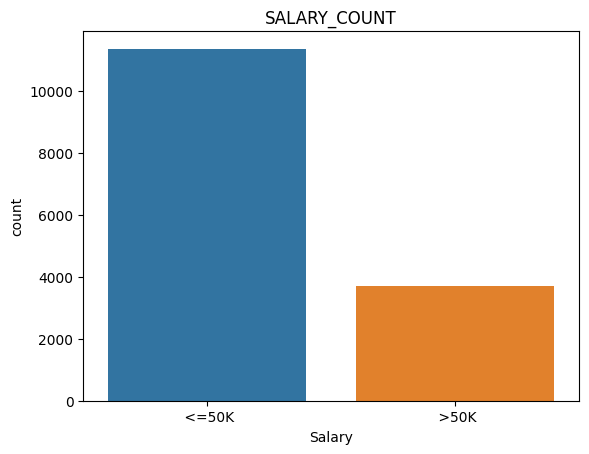

In [78]:
sns.countplot(x = 'Salary', data = test)
plt.title("SALARY_COUNT")
test['Salary'].value_counts()

<Axes: xlabel='education'>

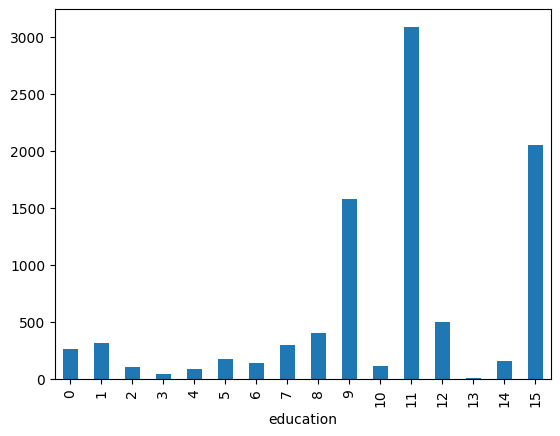

In [79]:
pd.crosstab(train1['Salary'], train1['education']).mean().plot(kind = 'bar')

<Axes: xlabel='occupation'>

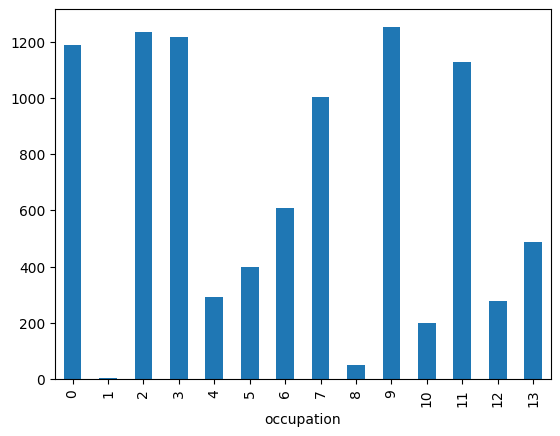

In [80]:
pd.crosstab(train1['Salary'], train1['occupation']).mean().plot(kind = 'bar')

<Axes: xlabel='workclass'>

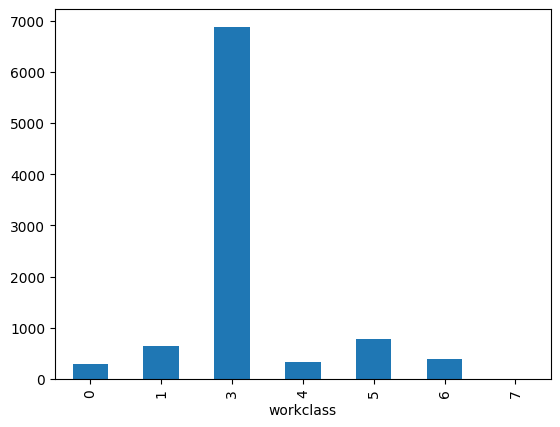

In [81]:
pd.crosstab(train1['Salary'], train1['workclass']).mean().plot(kind = 'bar')

<Axes: xlabel='sex'>

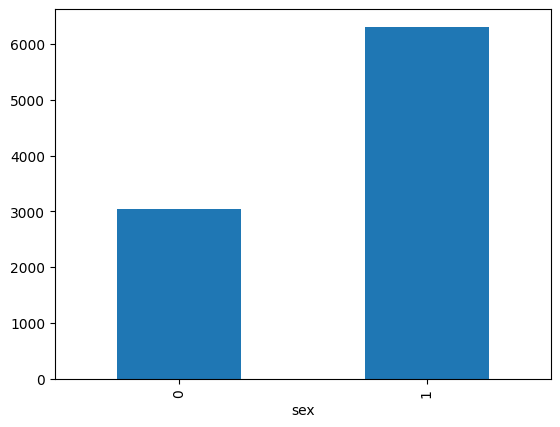

In [82]:
pd.crosstab(train1['Salary'], train1['sex']).mean().plot(kind = 'bar')

<Axes: xlabel='relationship'>

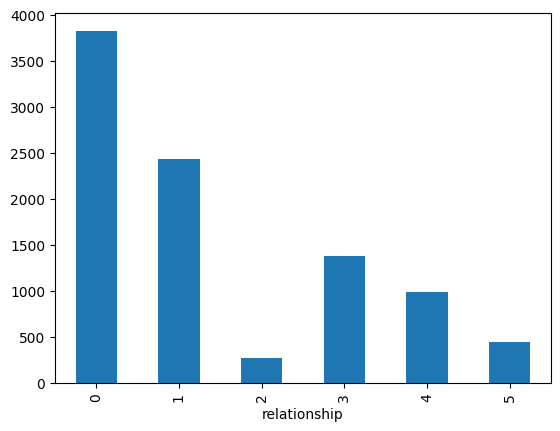

In [83]:
pd.crosstab(train1['Salary'], train1['relationship']).mean().plot(kind = 'bar')

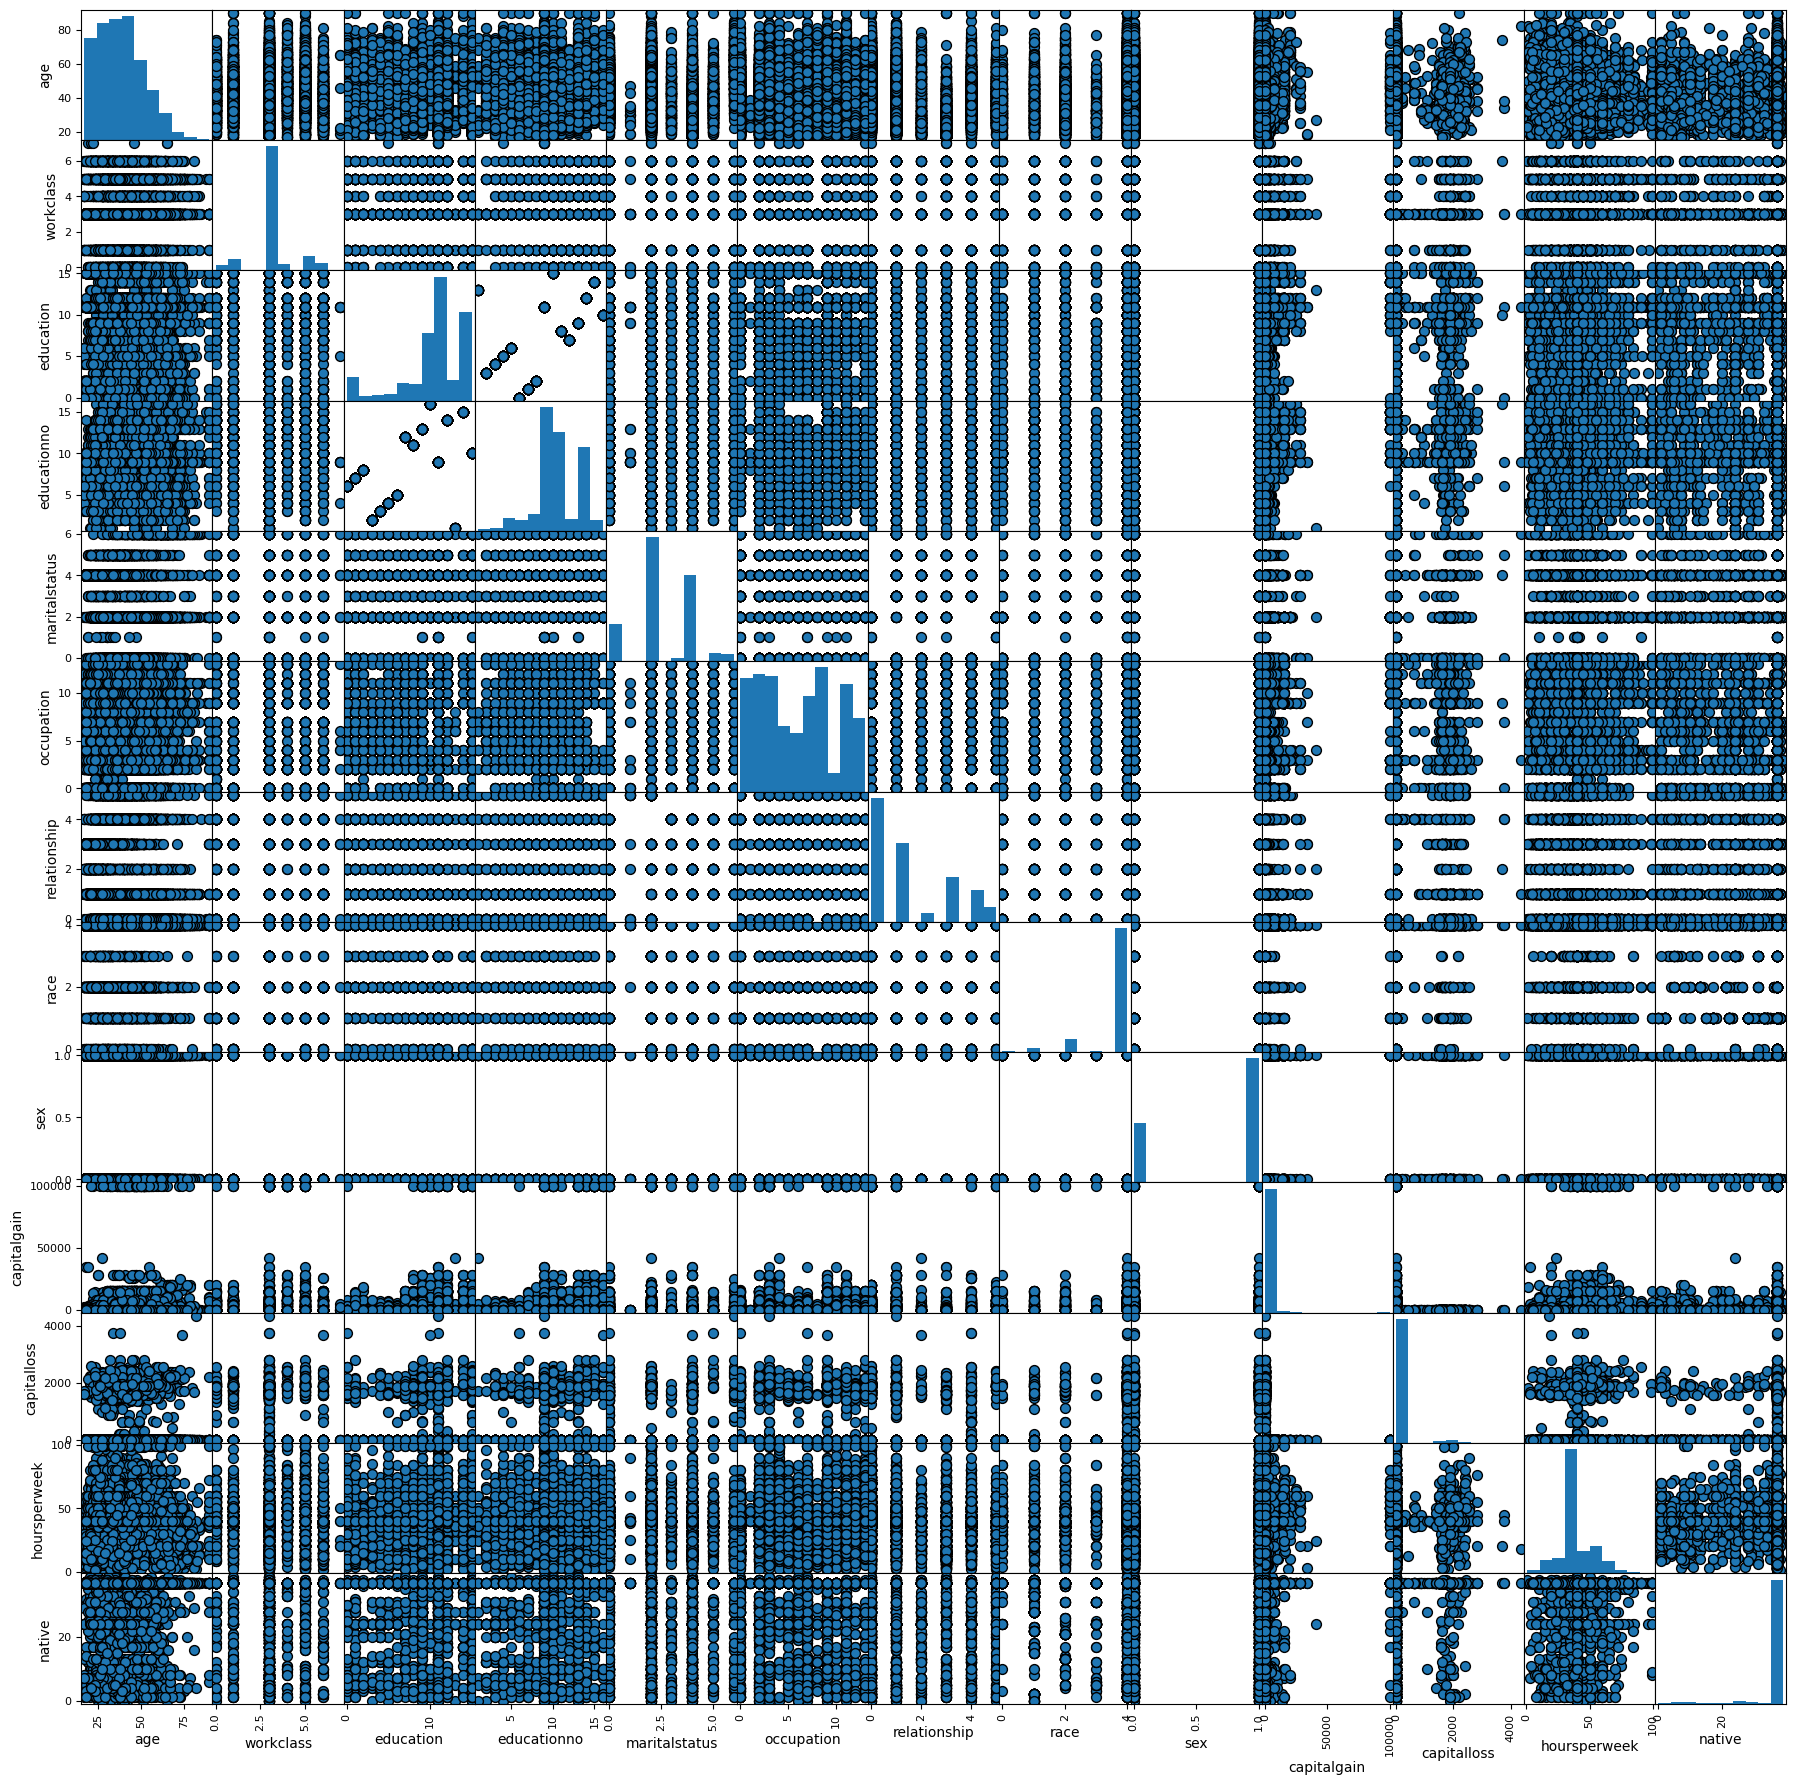

In [84]:
pd.plotting.scatter_matrix(train1,
                           figsize = [22, 22],
                           diagonal = 'hist',
                           alpha = 1,
                           s = 200,
                           marker = '.',
                           edgecolor = 'black')
plt.show()

In [85]:
string_columns = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native"]

In [103]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in string_columns:
  train[i] = number.fit_transform(train[i])
  test[i] = number.fit_transform(test[i])

In [104]:
train1.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
5,37,2,12,14.0,2,3,5,4,0,0.0,0.0,40.0,37,<=50K
6,49,2,6,5.0,3,7,1,2,0,0.0,0.0,16.0,21,<=50K
7,52,4,11,9.0,2,3,0,4,1,0.0,0.0,45.0,37,>50K
8,31,2,12,14.0,4,9,1,4,0,14084.0,0.0,50.0,37,>50K
9,42,2,9,13.0,2,3,0,4,1,5178.0,0.0,40.0,37,>50K


In [106]:
test.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,>50K
6,24,2,15,10,4,7,4,4,0,0,0,40,37,<=50K
7,55,2,5,4,2,2,0,4,1,0,0,10,37,<=50K
8,65,2,11,9,2,6,0,4,1,6418,0,40,37,>50K
9,36,0,9,13,2,0,0,4,1,0,0,40,37,<=50K


In [107]:
col_names = train1.columns
col_names

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [108]:
len(col_names)

14

In [109]:
train1.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
5,37,2,12,14.0,2,3,5,4,0,0.0,0.0,40.0,37,<=50K
6,49,2,6,5.0,3,7,1,2,0,0.0,0.0,16.0,21,<=50K
7,52,4,11,9.0,2,3,0,4,1,0.0,0.0,45.0,37,>50K
8,31,2,12,14.0,4,9,1,4,0,14084.0,0.0,50.0,37,>50K
9,42,2,9,13.0,2,3,0,4,1,5178.0,0.0,40.0,37,>50K


In [110]:
test.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,>50K
6,24,2,15,10,4,7,4,4,0,0,0,40,37,<=50K
7,55,2,5,4,2,2,0,4,1,0,0,10,37,<=50K
8,65,2,11,9,2,6,0,4,1,6418,0,40,37,>50K
9,36,0,9,13,2,0,0,4,1,0,0,40,37,<=50K


In [111]:
x_train1 = train1[col_names[0:13]]
y_train1 = train1[col_names[13]]
x_test = test[col_names[0:13]]
y_test = test[col_names[13]]

In [112]:
def norm_func(i):
  x = (i - i.min())/(i.max() - i.min())
  return(x)

In [113]:
x_train1 = norm_func(x_train1)
x_test = norm_func(x_test)

In [114]:
model_linear = SVC(kernel = "linear", random_state = 40, gamma = 0.1, C = 1)
model_linear.fit(x_train1, y_train1)

SVC(C=1, gamma=0.1, kernel='linear', random_state=40)

In [115]:
pred_test_linear = model_linear.predict(x_test)

In [116]:
np.mean(pred_test_linear == y_test)

0.8058432934926959

In [117]:
model_poly = SVC(kernel = "poly", random_state = 40, gamma = 0.1, C = 1)
model_poly.fit(x_train1, y_train1)
pred_test_poly = model_poly.predict(x_test)

In [118]:
np.mean(pred_test_poly == y_test)

0.8175298804780876

In [120]:
model_rbf = SVC(kernel = "rbf", random_state = 40, gamma = 0.1, C = 1)
model_rbf.fit(x_train1, y_train1)
pred_test_rbf = model_rbf.predict(x_test)

In [121]:
np.mean(pred_test_rbf == y_test)

0.8250332005312085

In [122]:
model_sig = SVC(kernel = "sigmoid", random_state = 40, gamma = 0.1, C = 1)
model_sig.fit(x_train1, y_train1)
pred_test_sig = model_rbf.predict(x_test)

In [123]:
np.mean(pred_test_sig == y_test)

0.8250332005312085

In [124]:
clf = SVC()
parma_grid = [{'kernel':["rbf"], 'random_state':[40], 'gamma':[0.1], 'C':[1]}]

In [125]:
gsv = GridSearchCV(clf, parma_grid, cv = 10)
gsv.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [126]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8253871632621964)

In [127]:
clf = SVC(C = 15, gamma = 50)
clf.fit(x_train1, y_train1)
y_pred = clf.predict(x_test)

In [128]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)

Accuracy: 79.9601593625498


In [129]:
confusion_matrix(y_test, y_pred)

array([[10369,   991],
       [ 2027,  1673]])

In [130]:
clf = SVC()
parma_grid = [{'kernel': ["linear"], 'random_state': [40], 'gamma': [0.1], 'C': [1]}]

In [131]:
gsv = GridSearchCV(clf, parma_grid, cv = 10)
gsv.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [132]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8087438117464825)

In [133]:
clf = SVC(C = 15, gamma = 50)
clf.fit(x_train1, y_train1)
y_pred = clf.predict(x_test)

In [134]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)

Accuracy: 79.9601593625498


In [135]:
confusion_matrix(y_test, y_pred)

array([[10369,   991],
       [ 2027,  1673]])

In [136]:
clf = SVC()
param_grid = [{'kernel': ["poly"], 'random_state': [40], 'gamma': [0.1], 'C': [1]}]

In [137]:
gsv = GridSearchCV(clf, param_grid, cv = 10)
gsv.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [138]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.817948369829851)

In [139]:
clf = SVC(C = 15, gamma = 50)
clf.fit(x_train1, y_train1)
y_pred = clf.predict(x_test)

In [140]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)

Accuracy: 79.9601593625498


In [141]:
clf = SVC()
param_grid = [{'kernel': ["sigmoid"], 'random_state': [40], 'gamma': [0.1], 'C': [1]}]

In [142]:
gsv = GridSearchCV(clf, param_grid, cv = 10)
gsv.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [143]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7957939353110539)

In [144]:
clf = SVC(C = 15, gamma = 50)
clf.fit(x_train1, y_train1)
y_pred = clf.predict(x_test)

In [145]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)

Accuracy: 79.9601593625498
